# 1. Asignar frecuencias a GSM
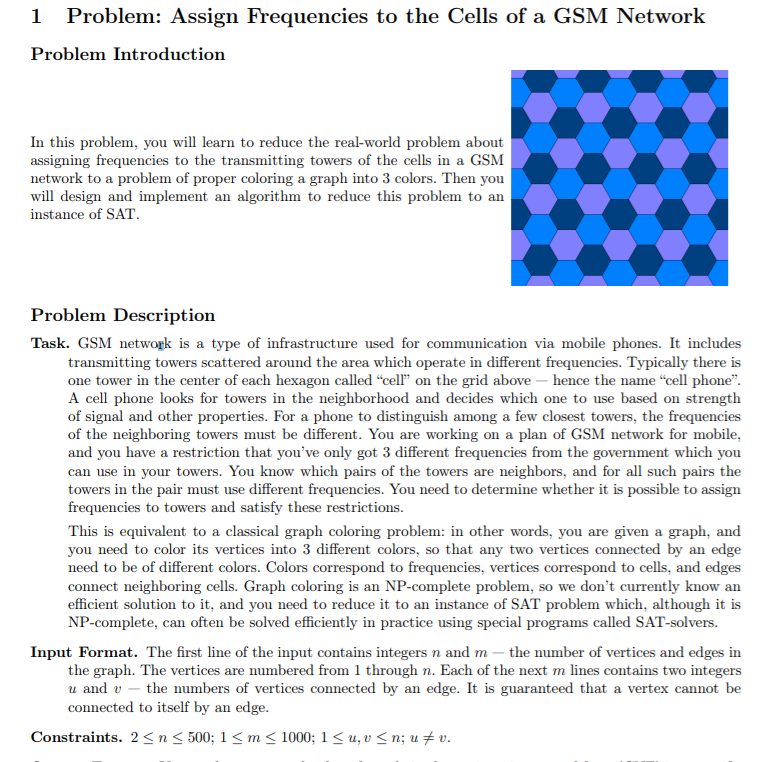

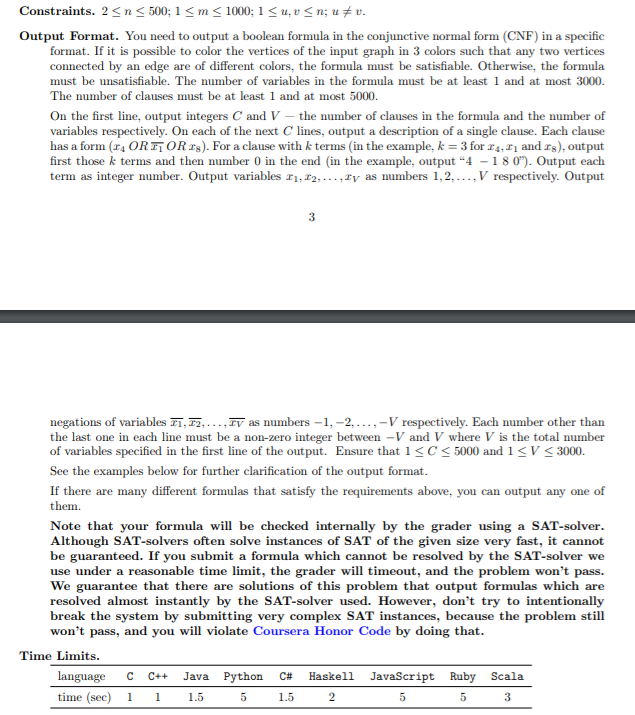

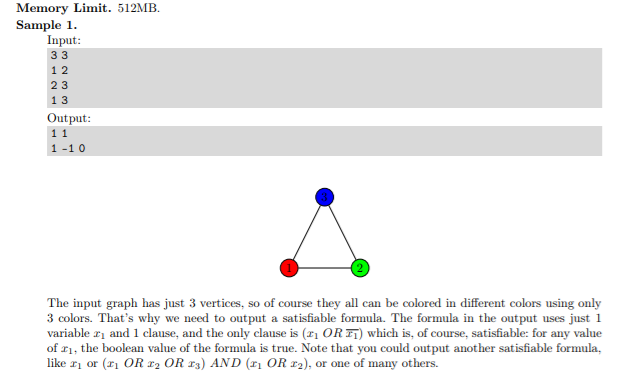

Nos dan un grafo y tenemos que colorearlo de 3 colores tal que no haya dos nodos con el mismo color. <br>
Lo unico que tiene que hacer el codigo es transformar el problema en un CNF, no resolverlo

In [25]:
# creamos una variable x_{ij} que es true si el nodo i est'a coloreado con 
#el color j 1<=j<= 3. 
import itertools
import os

#tomamos el numero de nodos n y de ejes m
n , m = [int(x) for x in input().split()]


#definimos un array con todas las conexiones
conexiones =[]
for i in range(m):
    #agregamos las conexiones (1-indexing)
    p,q = [int(x) for x in input().split()]
    conexiones.append((p,q))


#definimos un array donde vamos a guardar las clauses
clauses=[]
#los digits son los posibles colores de cada nodo, 1,2,3.
digits = [1,2,3]


#varnum le asocia a x_{ij} un nuero unico

def varnum(i,j):
    assert(j in digits)
    #le asocia el numero (j-1)*n+1
    return (j-1)*n+1
    #es decir, para todo i, i indica la proposion x_{i1}, 
    #n+i indica x_{i2} , y 2n+i indica x_{i3}


# son las clauses necesarias para decir que s'olo se debe de cumplir
#una de las proposiciones guardades en literales
def exactly_one_of(literals):
    clauses.append([l for l in literals])
    
    for pair in itertools.combinations(literals,2):
        clauses.append([-l for l in pair])

        
# cada nodo tiene exactamente un color
for i in range(1,n+1):
    #para todo i, s'olo se puede cumplir una de las propocisiones 
    #x_{i1}, x_{i2} ,x_{i3} 
    exactly_one_of([varnum(i,j) for j in digits])
    
#dos vertices juntos no son del mismo color    
for i in range(m):
    #para toda conexion
    p,q = conexiones[i]
    #tenemos la condicion de que (p no es color 1 o q no es color 1) y 
    #(p no es color 2 o q no es color 2) y (p no es color 3 o q no es color 3)
    #con ello, aseguramos que p y q no pueden ser del mismo color.
    #pues es equivalente a no(p y q son color 1) y no(p y q son color 2) y 
    #(p y q son color 3)
    clauses.append([  -p, -q])    
    clauses.append([-n - p,-n - q])    
    clauses.append([-2*n - p,-2*n -q])    
    

#l es la cantidad de clauses y v la cantidad de variables en las clauses
l = len(clauses)
v = 3*n
res =[l,v]

#imprimimos todas las clauses con un 0 al final como lo pide el programa SAT
def imprime(clauses):
    print(*res)
    for i in range(l):
        clauses[i].append(0)
        print(*clauses[i])

imprime(clauses)

3 3
1 2
2 3
1 3
21 9
1 4 7 0
-1 -4 0
-1 -7 0
-4 -7 0
2 5 8 0
-2 -5 0
-2 -8 0
-5 -8 0
3 6 9 0
-3 -6 0
-3 -9 0
-6 -9 0
-1 -2 0
-4 -5 0
-7 -8 0
-2 -3 0
-5 -6 0
-8 -9 0
-1 -3 0
-4 -6 0
-7 -9 0


# 2. Cleaning the apartment
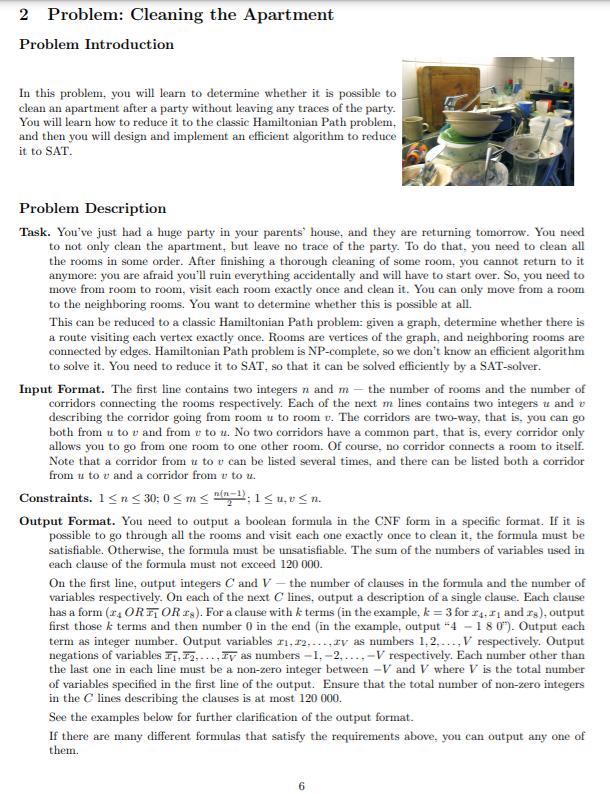


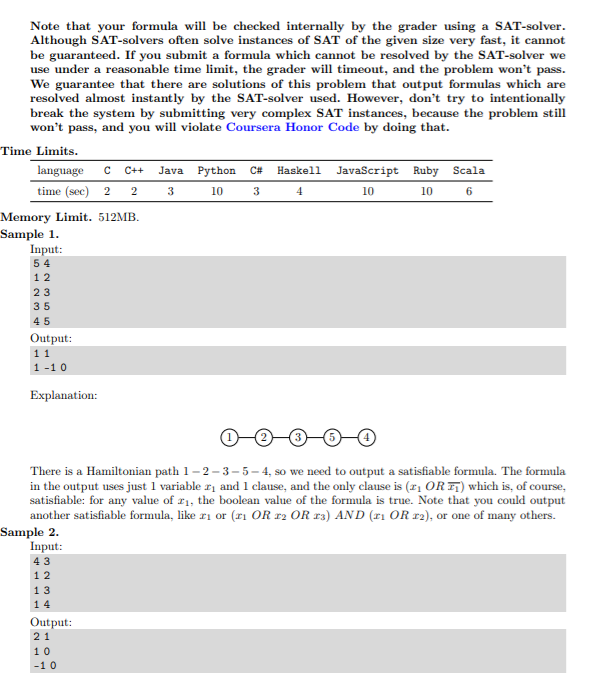

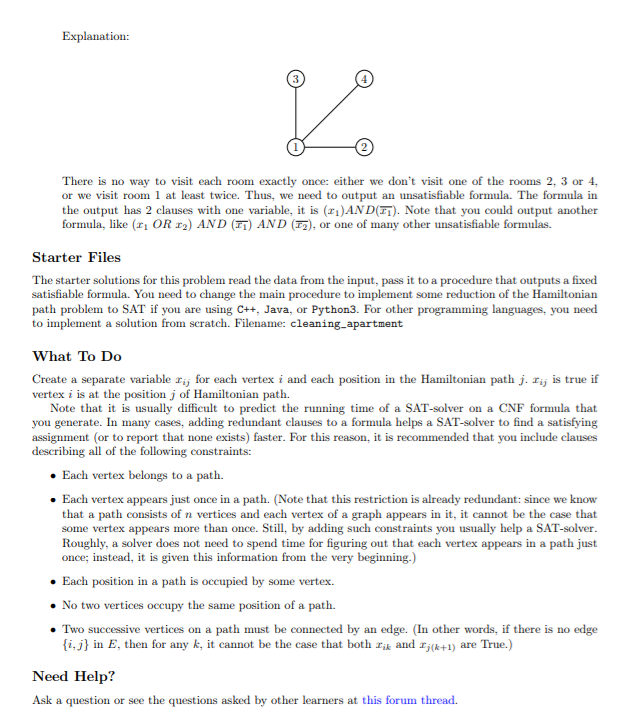


Basicamente es un problema de Hamilton. Dado un grafo, determinar si se puede visitar cada nodo una sola vez Hay que reducirlo a un SAT. <br>
n nodos y m ejes bidireccionales. <br>
Convertir a un CNF<br>
Outputear C, V (clauses and variables) y luego las C clauses. <br>

In [ ]:
# python3
import itertools

#tomamos n, m
n, m = map(int, input().split())

#edges es una lista con todos los ejes.
edges = [list(map(int, input().split())) for i in range(m)]

# V contiene los primeros Clauses
V = []
for i in range(1, n + 1):
    #vamos iterando sobre todos los nodos
    #cada nodo debe de aparecer en el camino.
    # each node must appear in the path
    Xij = list(j for j in range((i-1) * n + 1, i * n + 1))
    V.append(Xij)
    # each node can only appear once in the path
    lst = list(-x for x in Xij)
    subsets = list(map(list, itertools.combinations(lst, 2)))
    V += subsets

E = []
for i in range(1, n + 1):
    # every position in the path must be occupied
    pos = list(k for k in range(i, n * n + i, n))
    E.append(pos)
    # every position in the path can only have one node
    lst = list(-x for x in pos)
    subsets = list(map(list, itertools.combinations(lst, 2)))
    E += subsets

lst = list(i for i in range(1, n + 1))
subsets = list(map(list, itertools.combinations(lst, 2)))
C = []
# Nonadjacent nodes can't be adjacent in the path
for a, b in subsets:
    if [a,b] not in edges and [b,a] not in edges:
        for i in range(1, n):
            C.append([-((a - 1) * n + i), -((b - 1) * n + i + 1)])
            C.append([-((b - 1) * n + i), -((a - 1) * n + i + 1)])

n_clauses = len(V) + len(E) + len(C)
n_variables = n * n
print(n_clauses, n_variables)

for clause in V:
    for i in clause:
        print(i, end=' ')
    print(0)

for clause in E:
    for i in clause:
        print(i, end=' ')
    print(0)

for clause in C:
    for i in clause:
        print(i, end=' ')
    print(0)